# Title : Heart Disease Prediction using R
## Author : Abhishek Chauhan 
## ID : MCS21024
## ```````````````````````````````````````````````````````````````````````

# Installing packages

In [53]:
install.packages("tidyverse")
install.packages("repr")
install.packages("corrplot")
install.packages("ggplot2")
install.packages("pROC")
install.packages("kernlab")

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'repr' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'pROC' is in use and will not be installed"
Warning message:
"package 'kernlab' is in use and will not be installed"


# Loading libraries

In [75]:
library(tidyverse)
library(repr)
library(corrplot)
library(ggplot2)
library(pROC)
library(kernlab)

# Data Preparation

In [76]:
heart.data <- read.csv("heart.csv")

## Exploring data

In [77]:
head(heart.data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [78]:
dim(heart.data)

[1] 303  14

In [79]:
tail(heart.data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [80]:
glimpse(heart.data)

Rows: 303
Columns: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1…
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <int> 1

## Columns of data 

In [81]:
colnames(heart.data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [82]:
summary(heart.data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

## Data Transformation

In [84]:
data2 <- heart.data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

In [85]:
tail(heart.data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Data Visualization

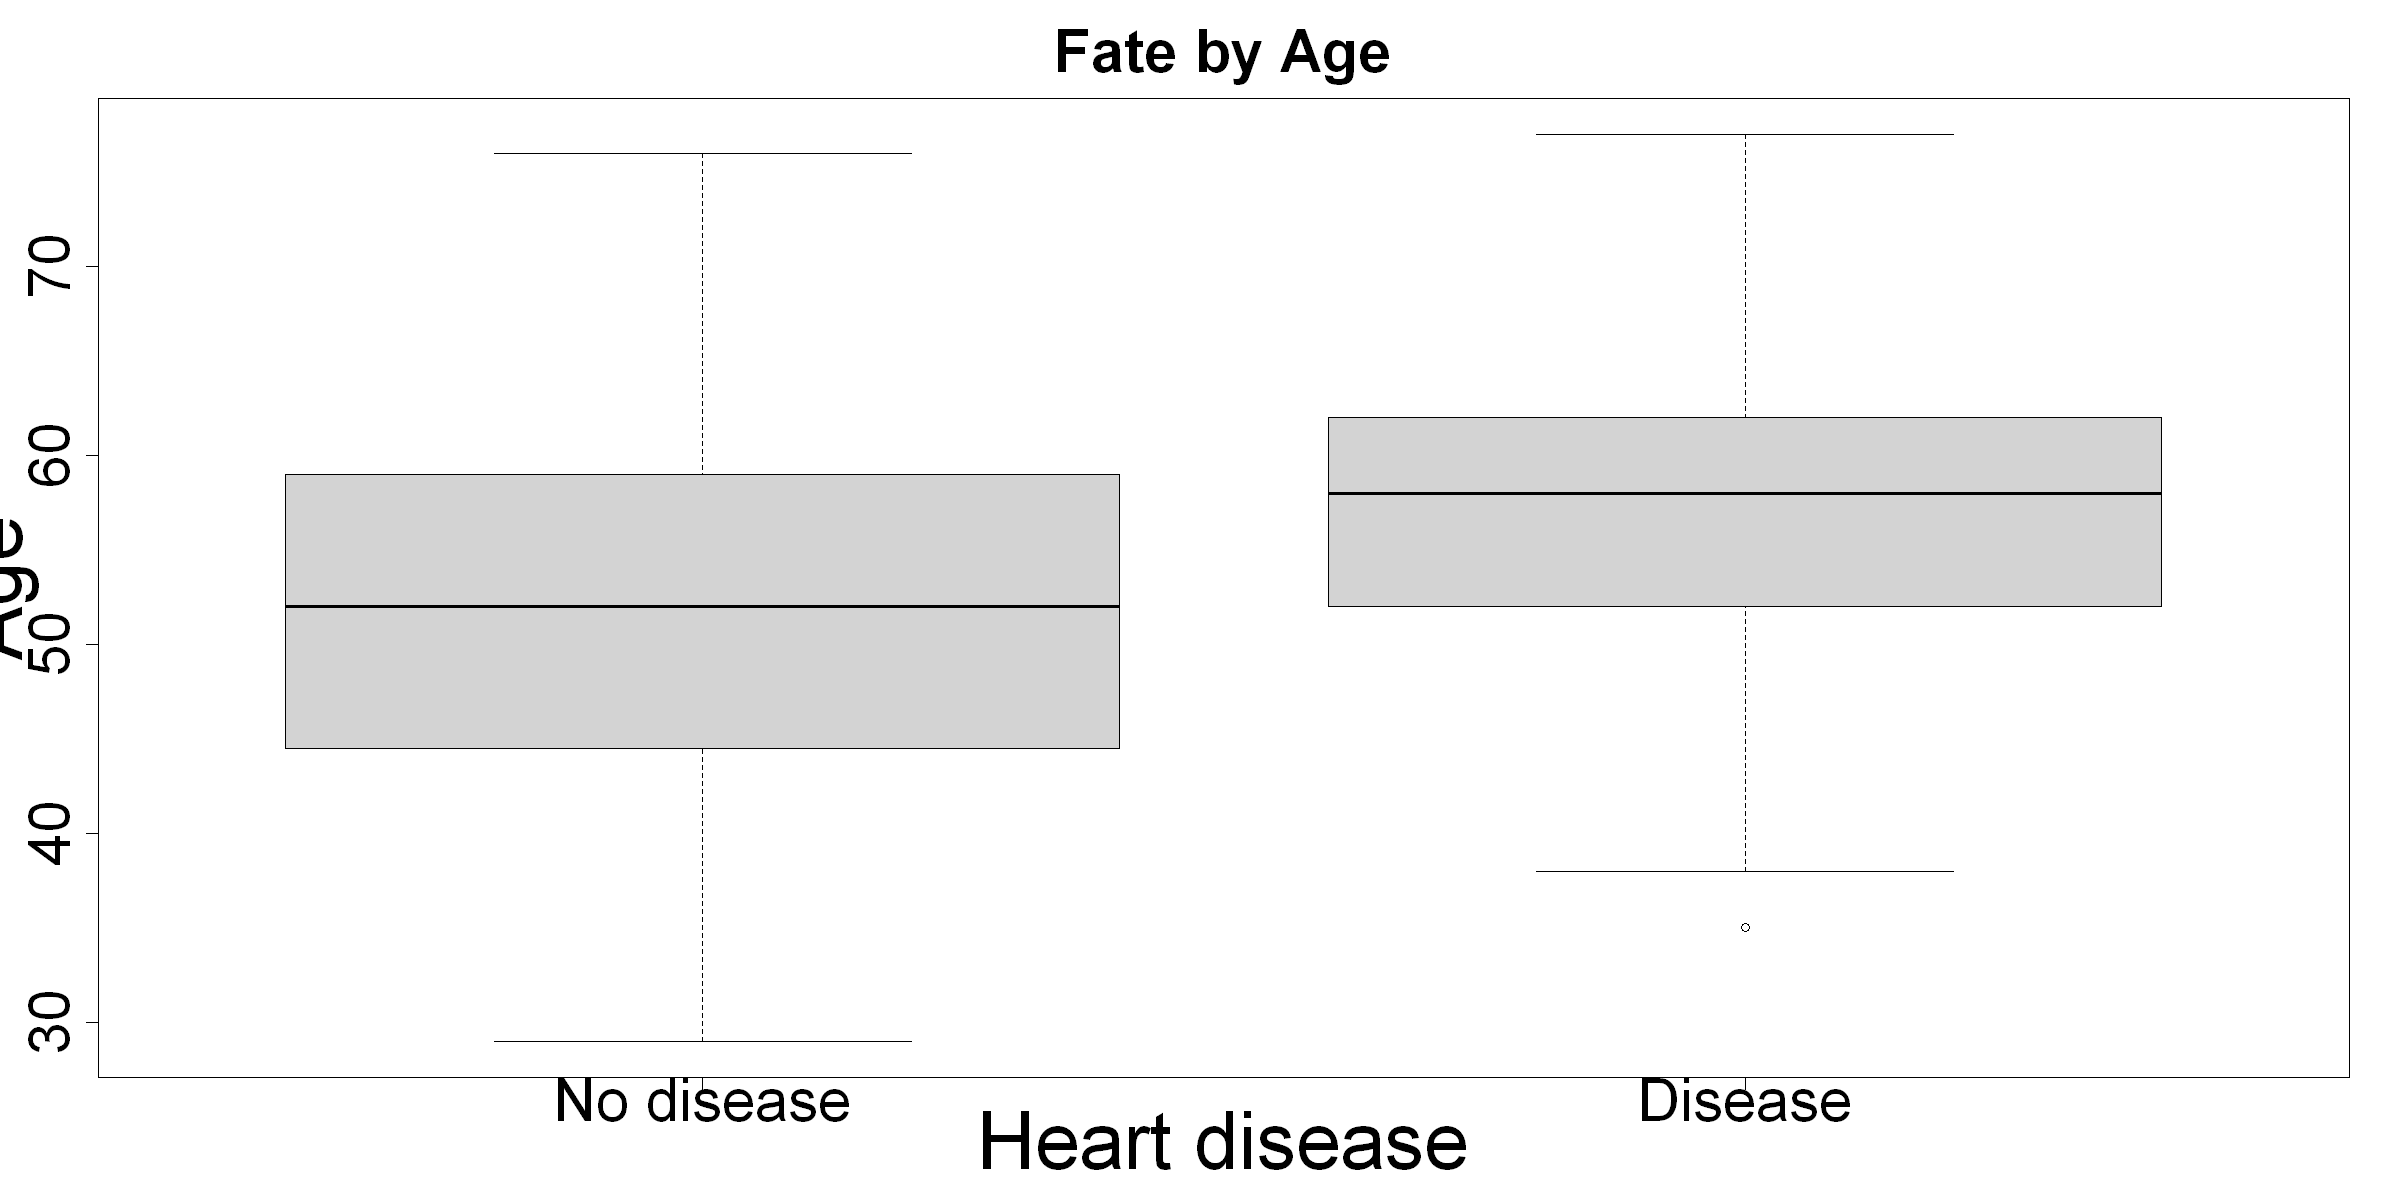

In [211]:
options(repr.plot.width =20, repr.plot.height =10)

boxplot(heart$age ~ heart$num,
        main="Fate by Age",
         ylab="Age",xlab="Heart disease", cex.lab=4, cex.axis=3, cex.main=3)

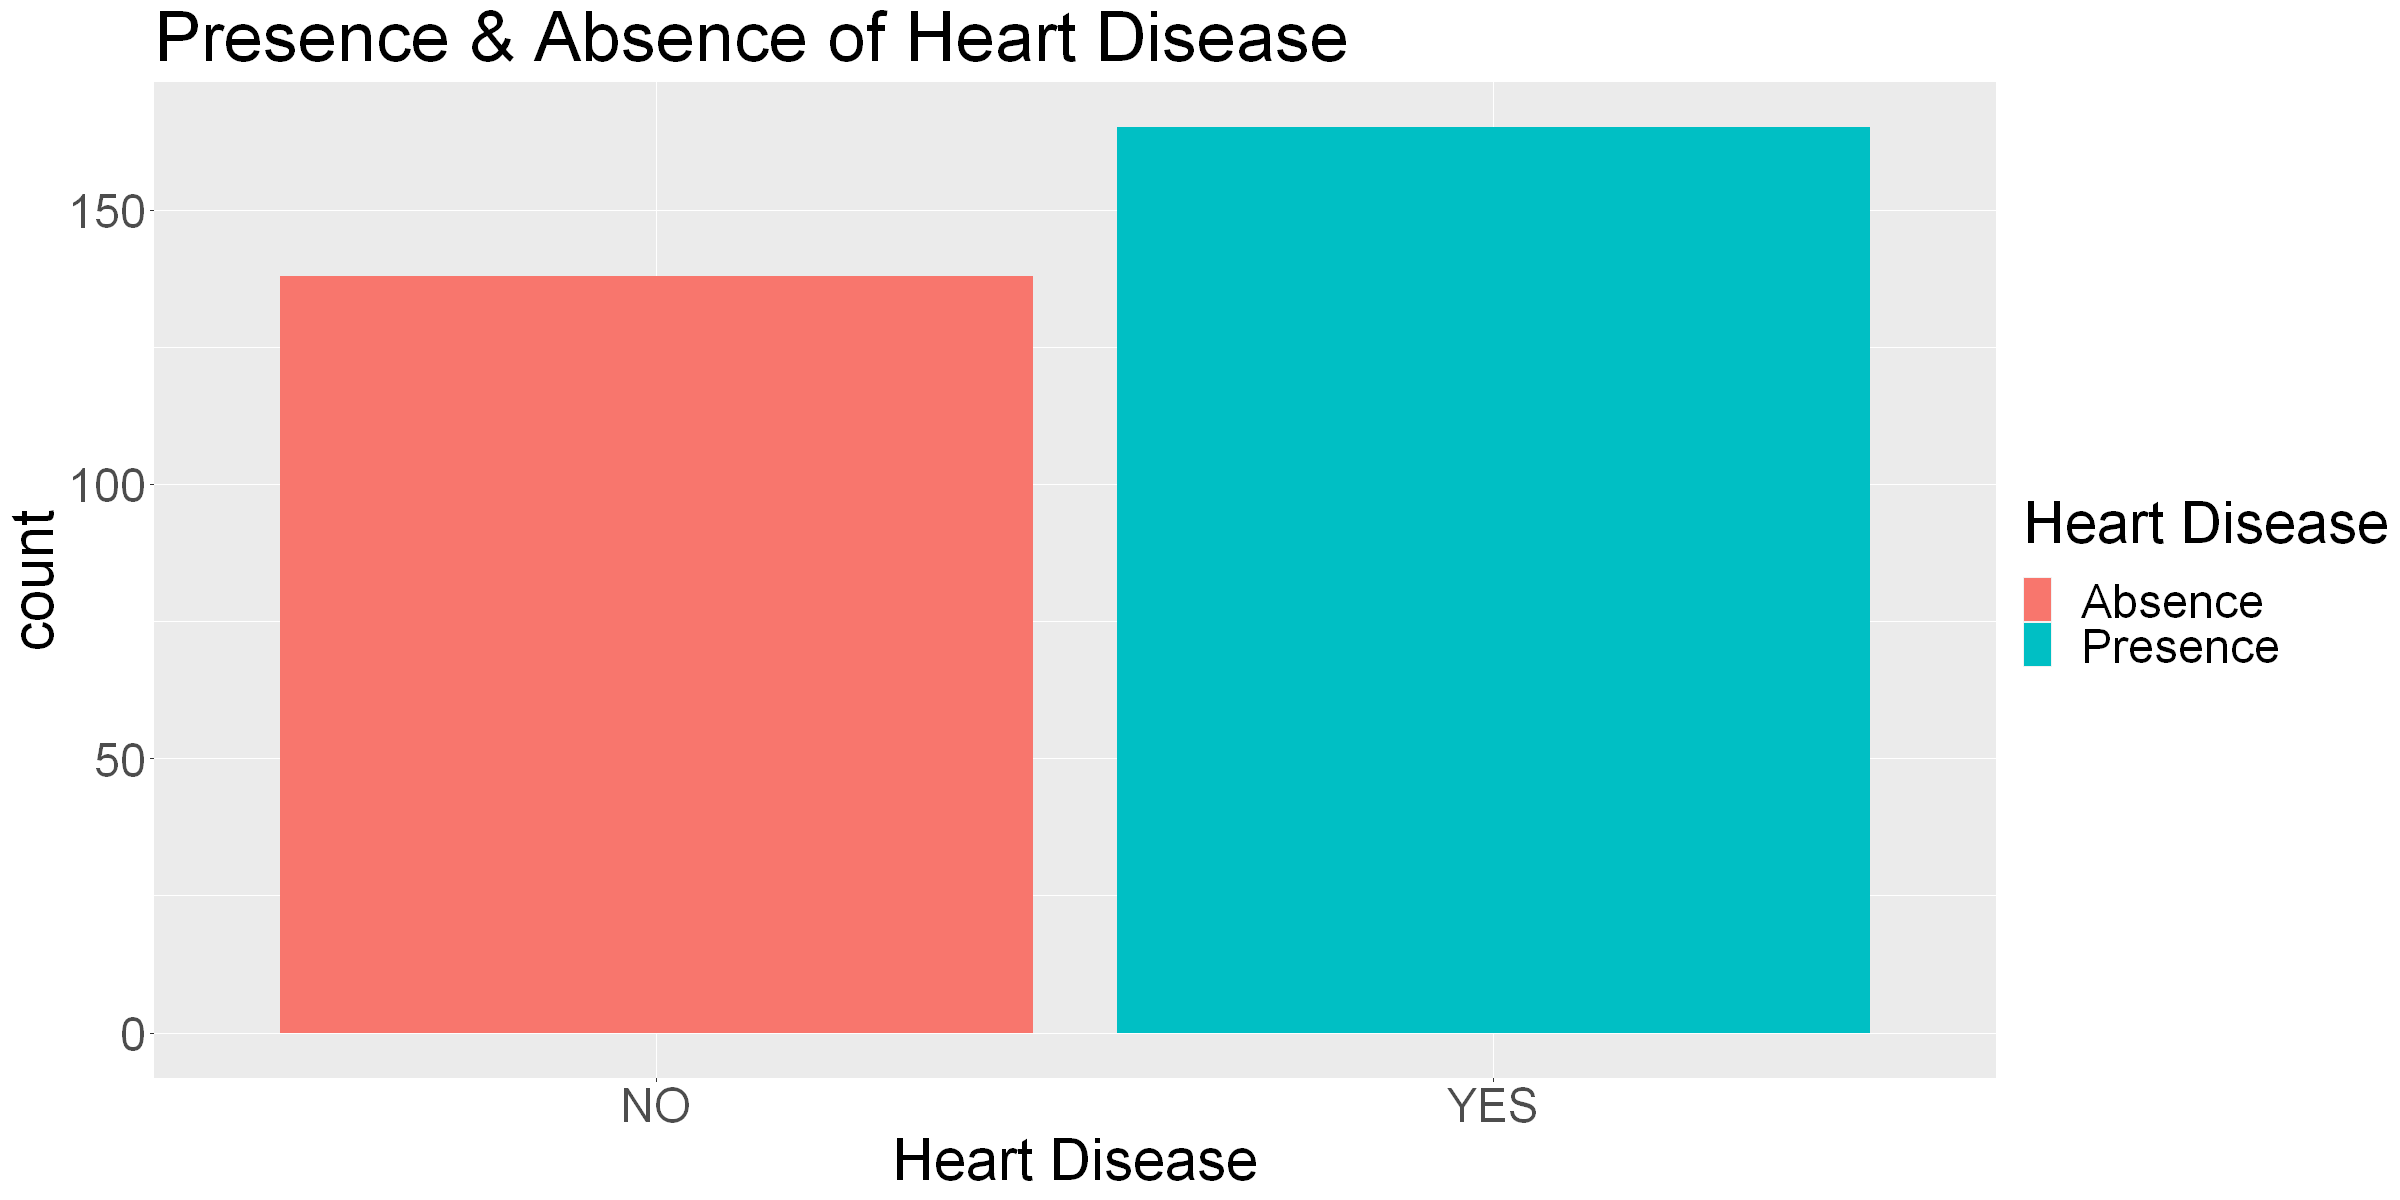

In [212]:
options(repr.plot.width =20, repr.plot.height =10)


# Bar Plot for target (heart disease)

ggplot(data2, aes(x=target, fill=target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence")) +
   theme(text=element_text(size=35))

## Checking target col values

In [213]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

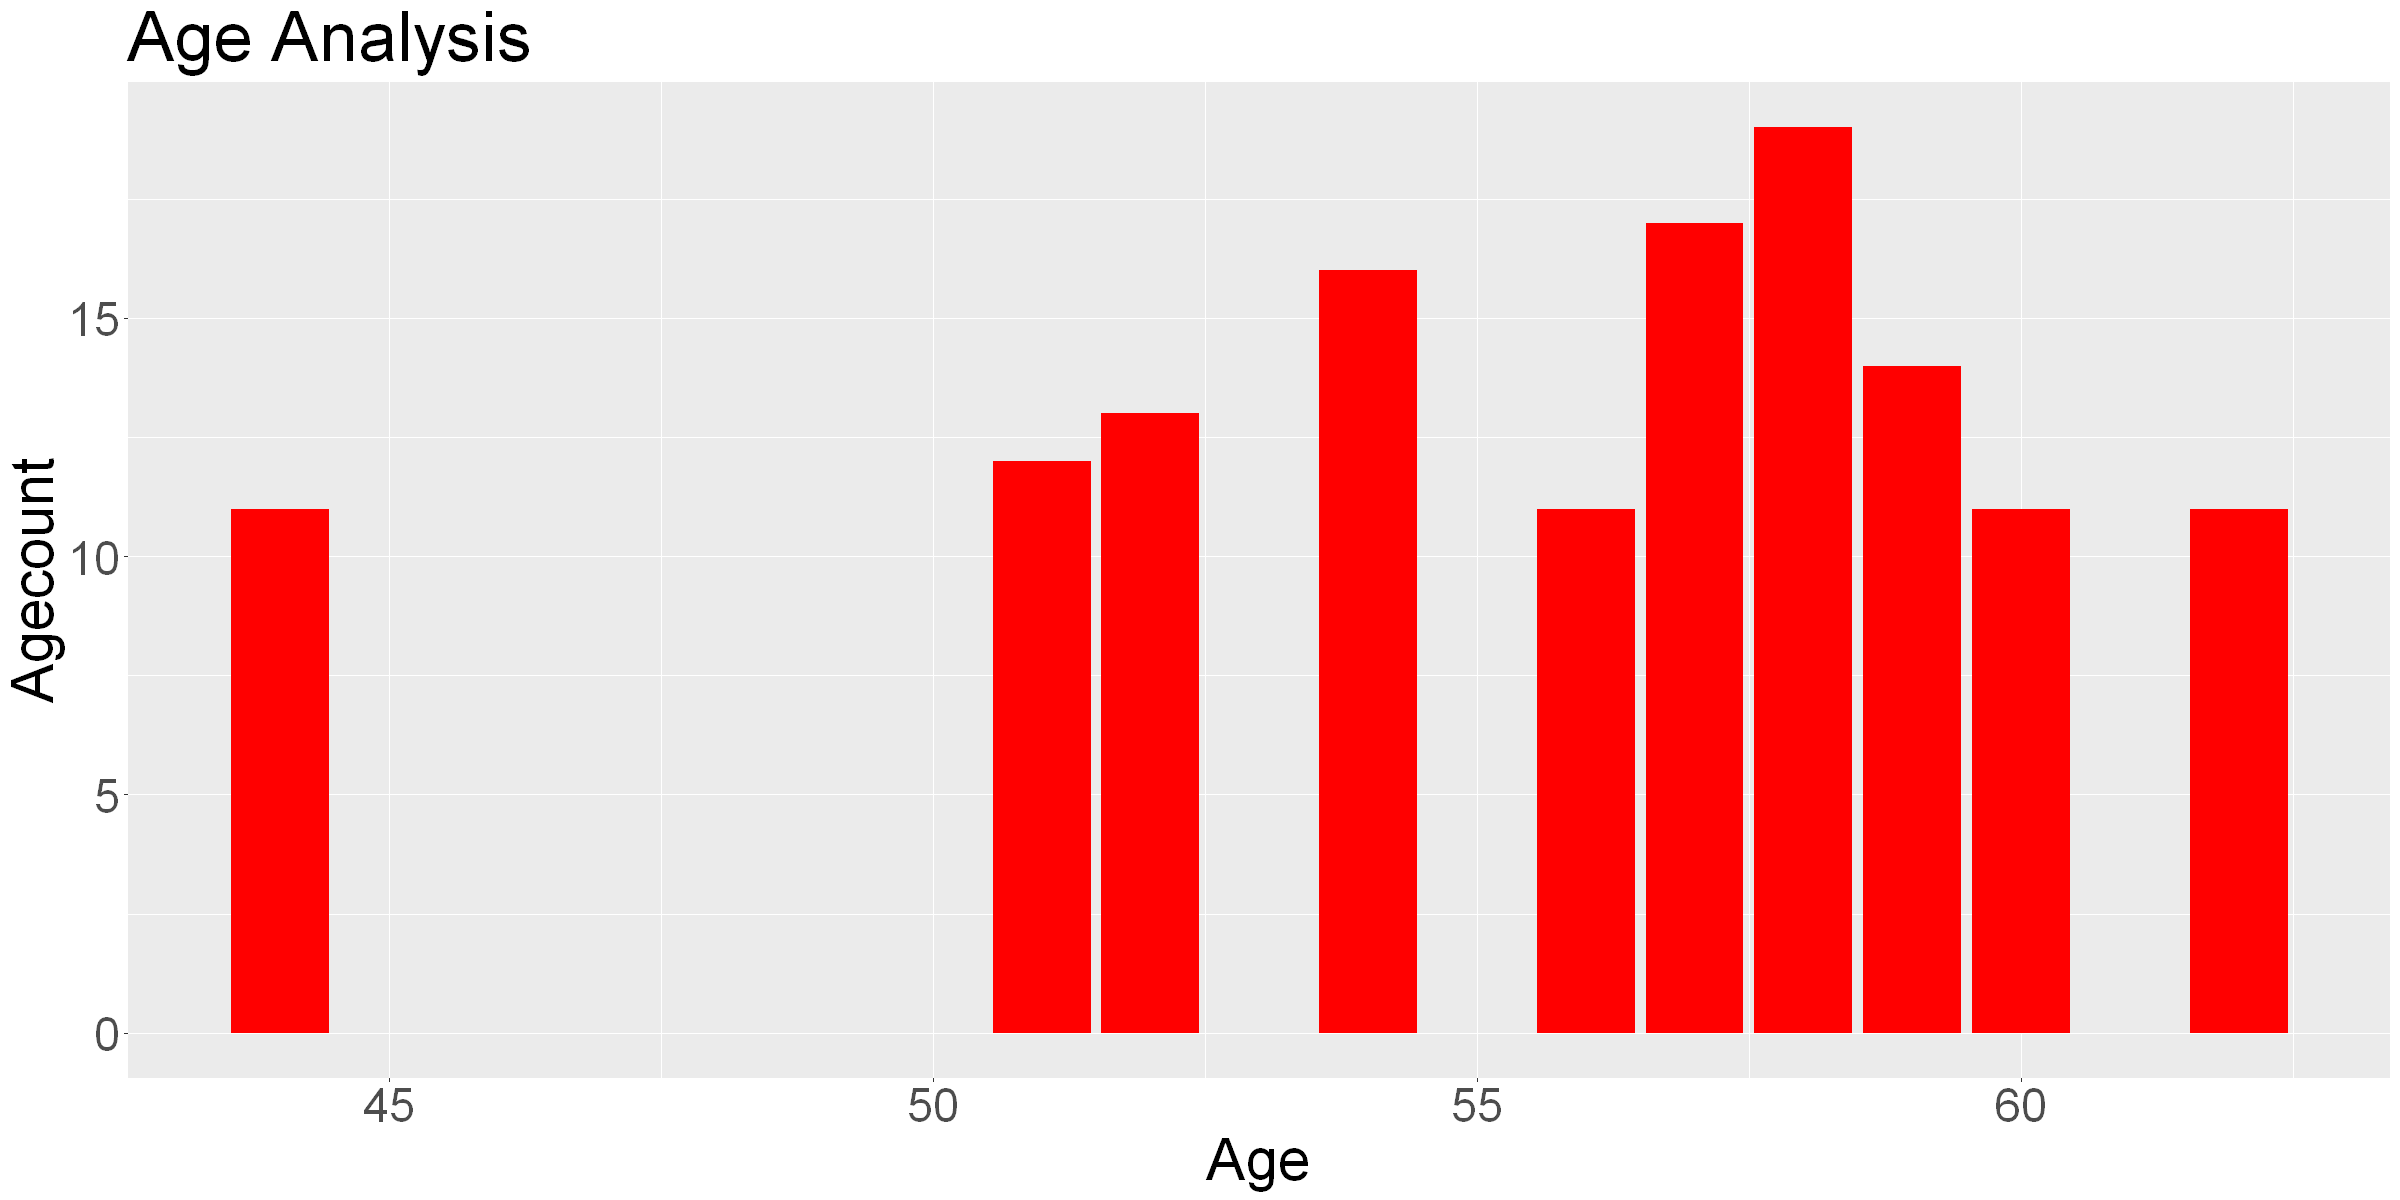

In [232]:
# count the frequency of the values of age

data2 %>%
  group_by(age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(age, n), fill = 'red')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount") +
  theme(text=element_text(size=35))

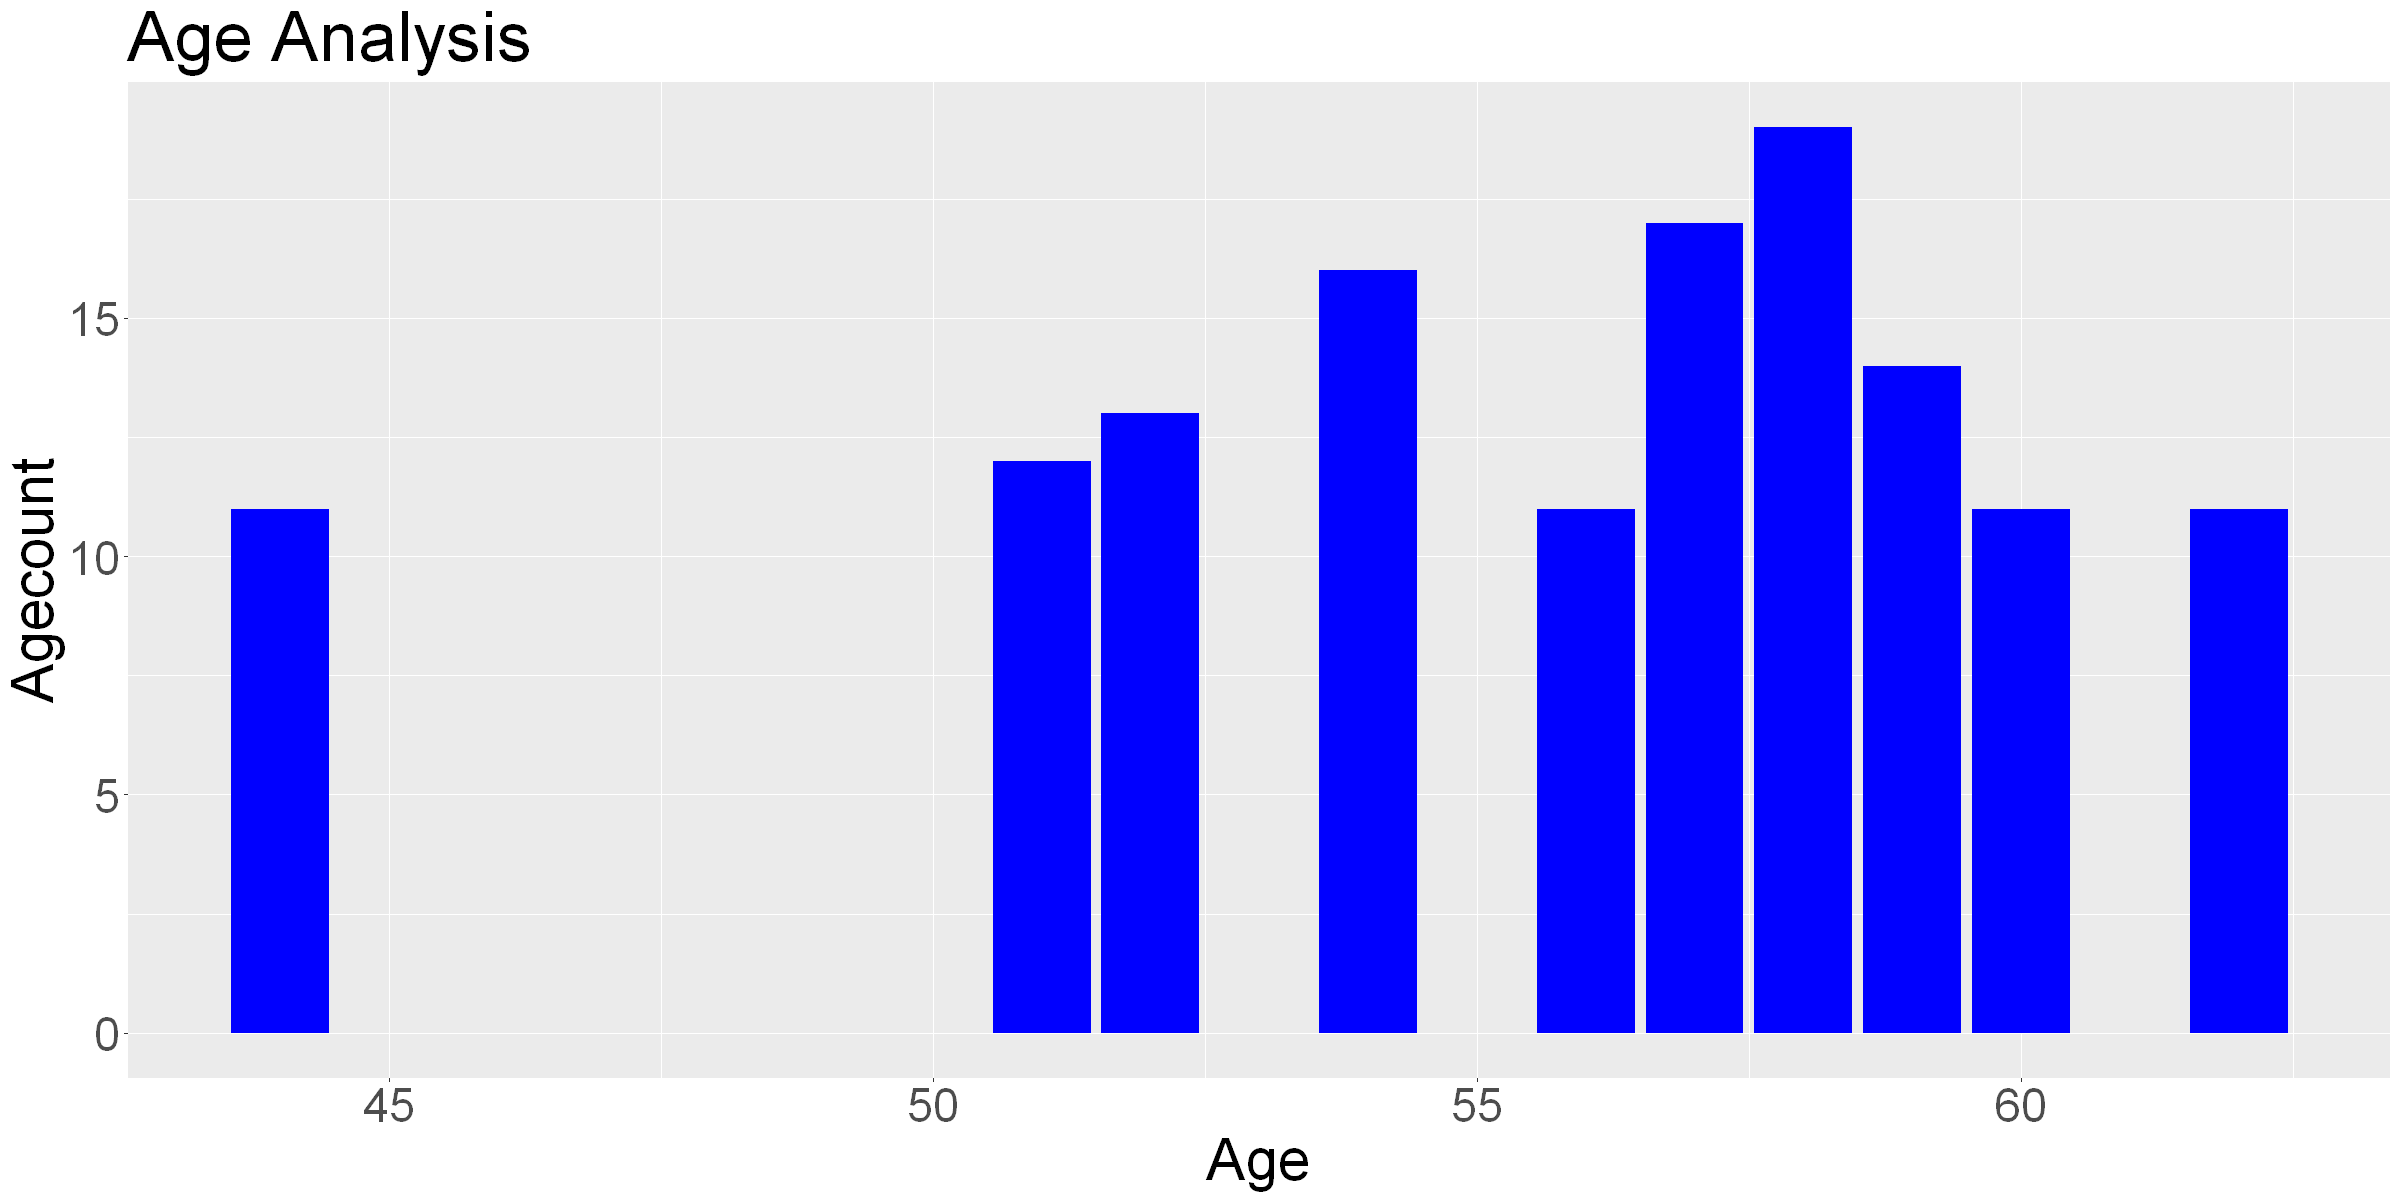

In [233]:
# count the frequency of the values of age

data2 %>%
  group_by(age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(age, n), fill = 'blue')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount") +
  theme(text=element_text(size=35))

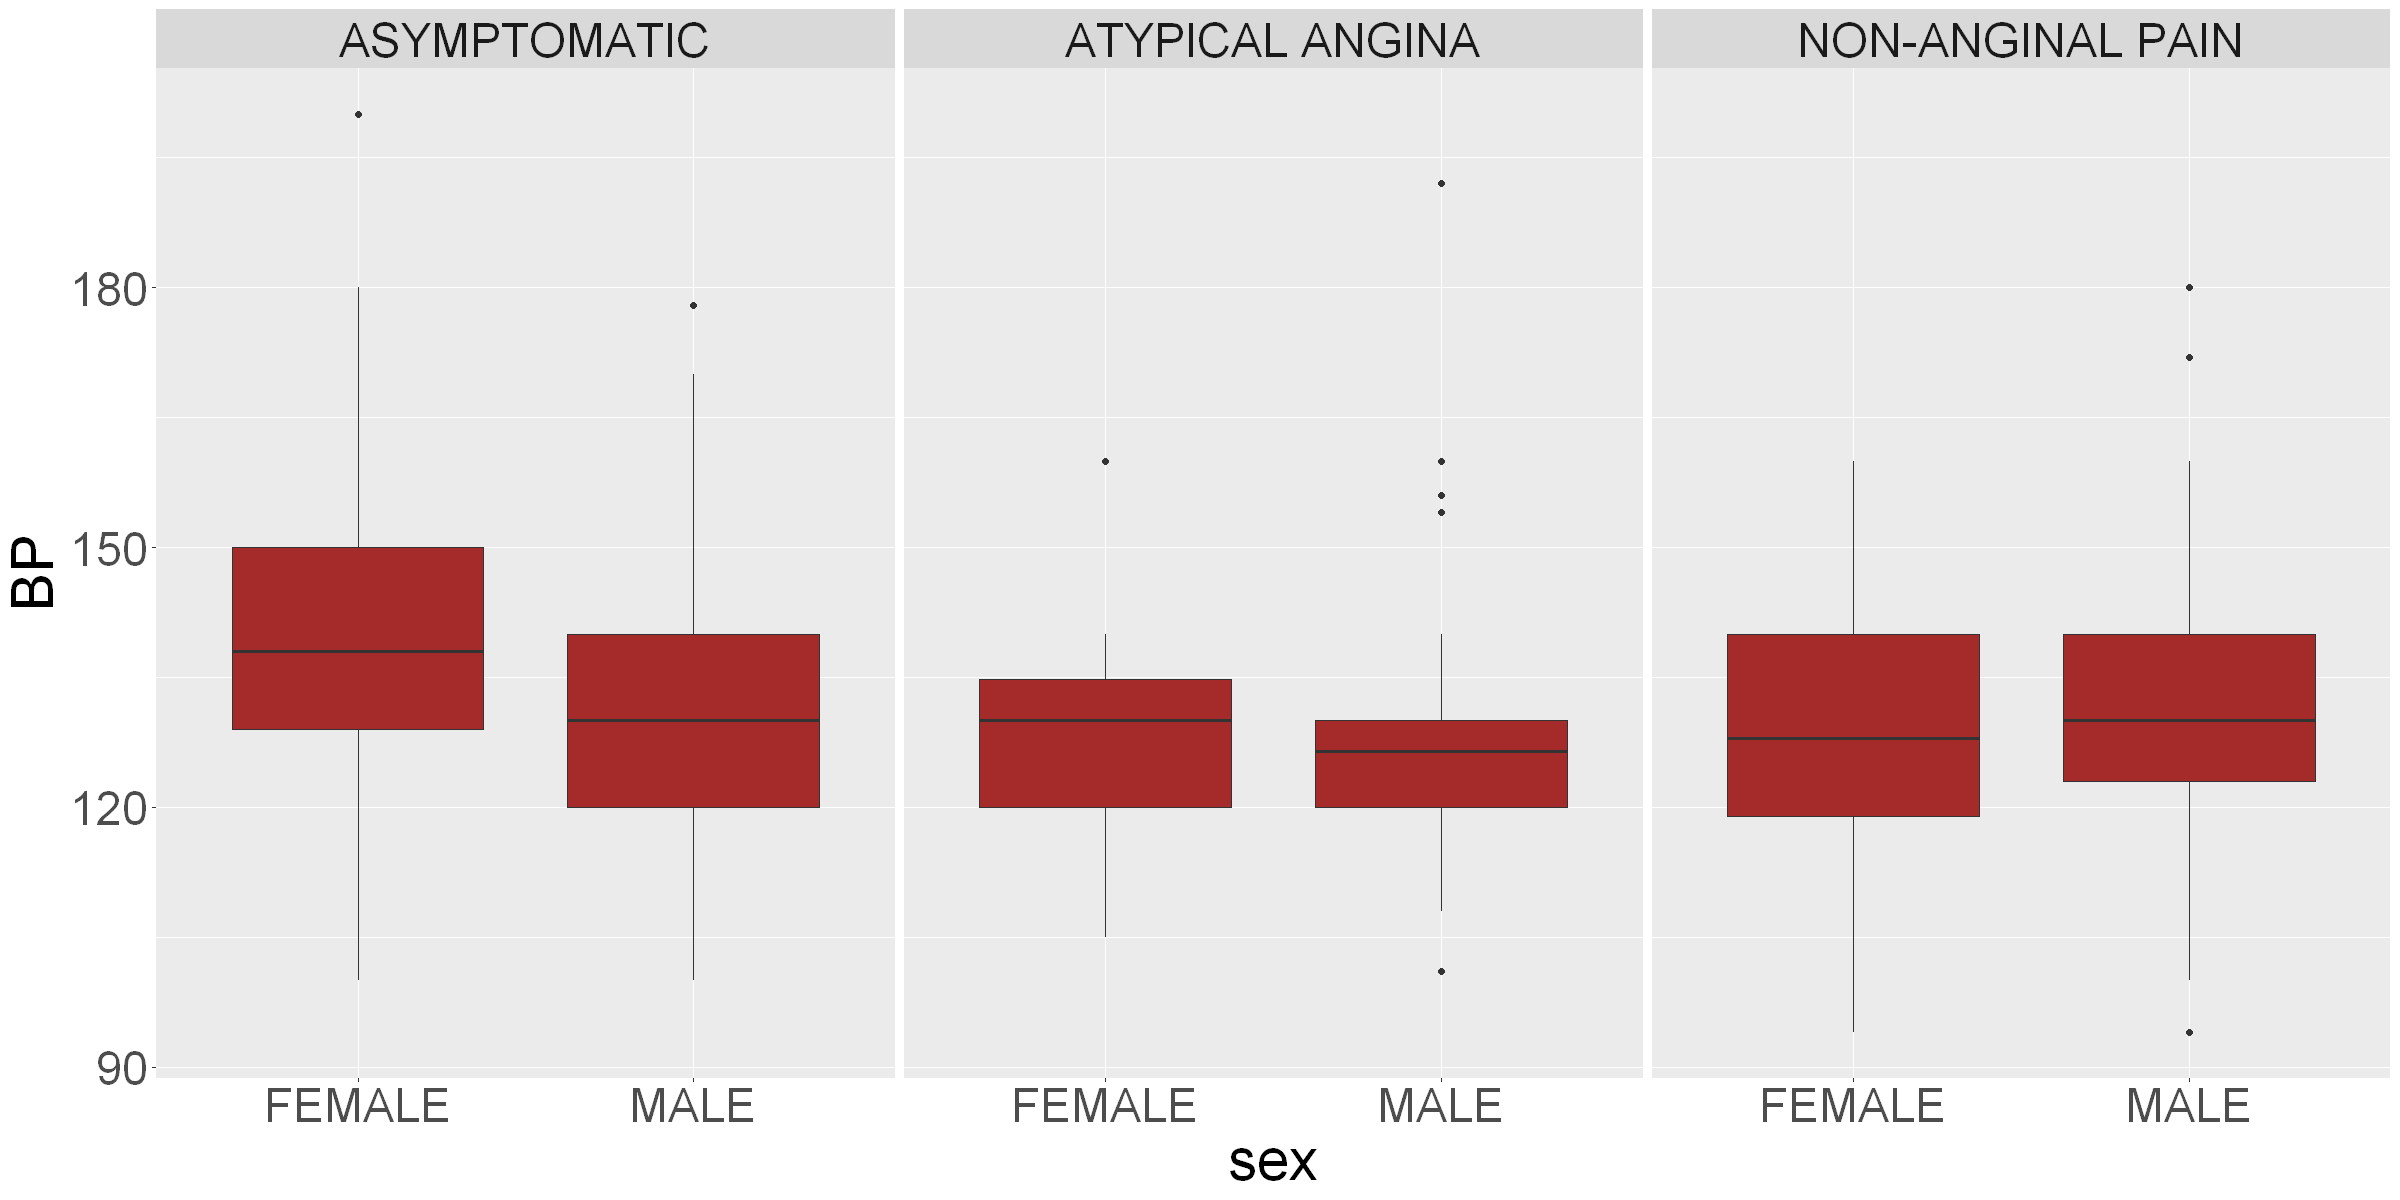

In [234]:
data2 %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='brown')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)+
  theme(text=element_text(size=35))

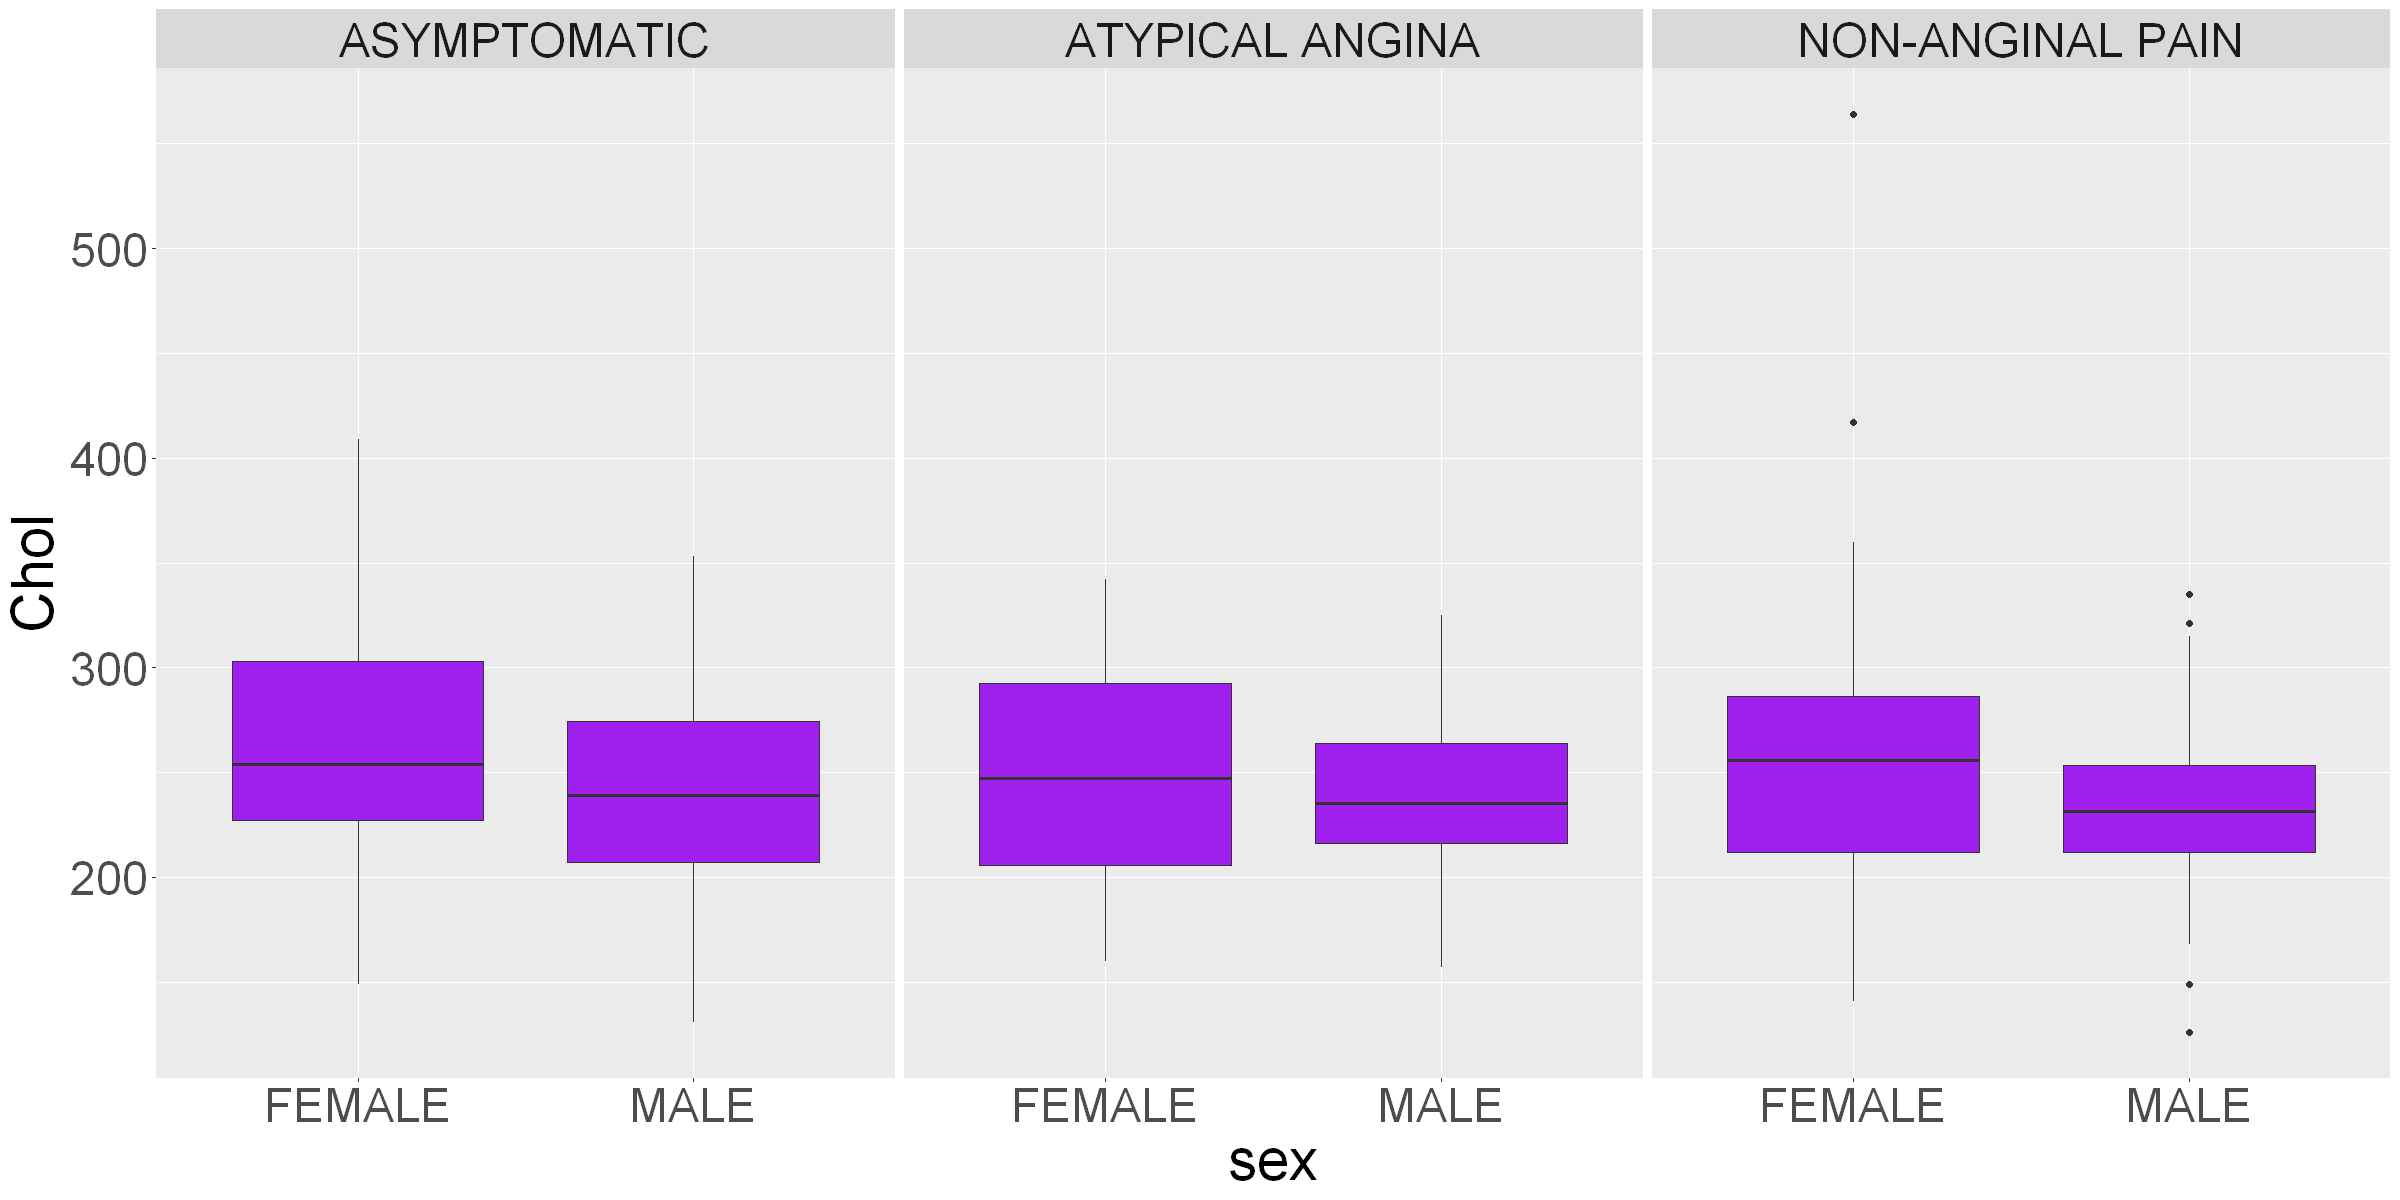

In [235]:
data2 %>%
  ggplot(aes(x=sex, y=chol))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('Chol')+
  facet_grid(~cp) +
  theme(text=element_text(size=35))

## Correlation

In [236]:
cor_heart <- cor(data2[, 10:14])
cor_heart

,age,trestbps,chol,thalach,oldpeak
age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


NULL

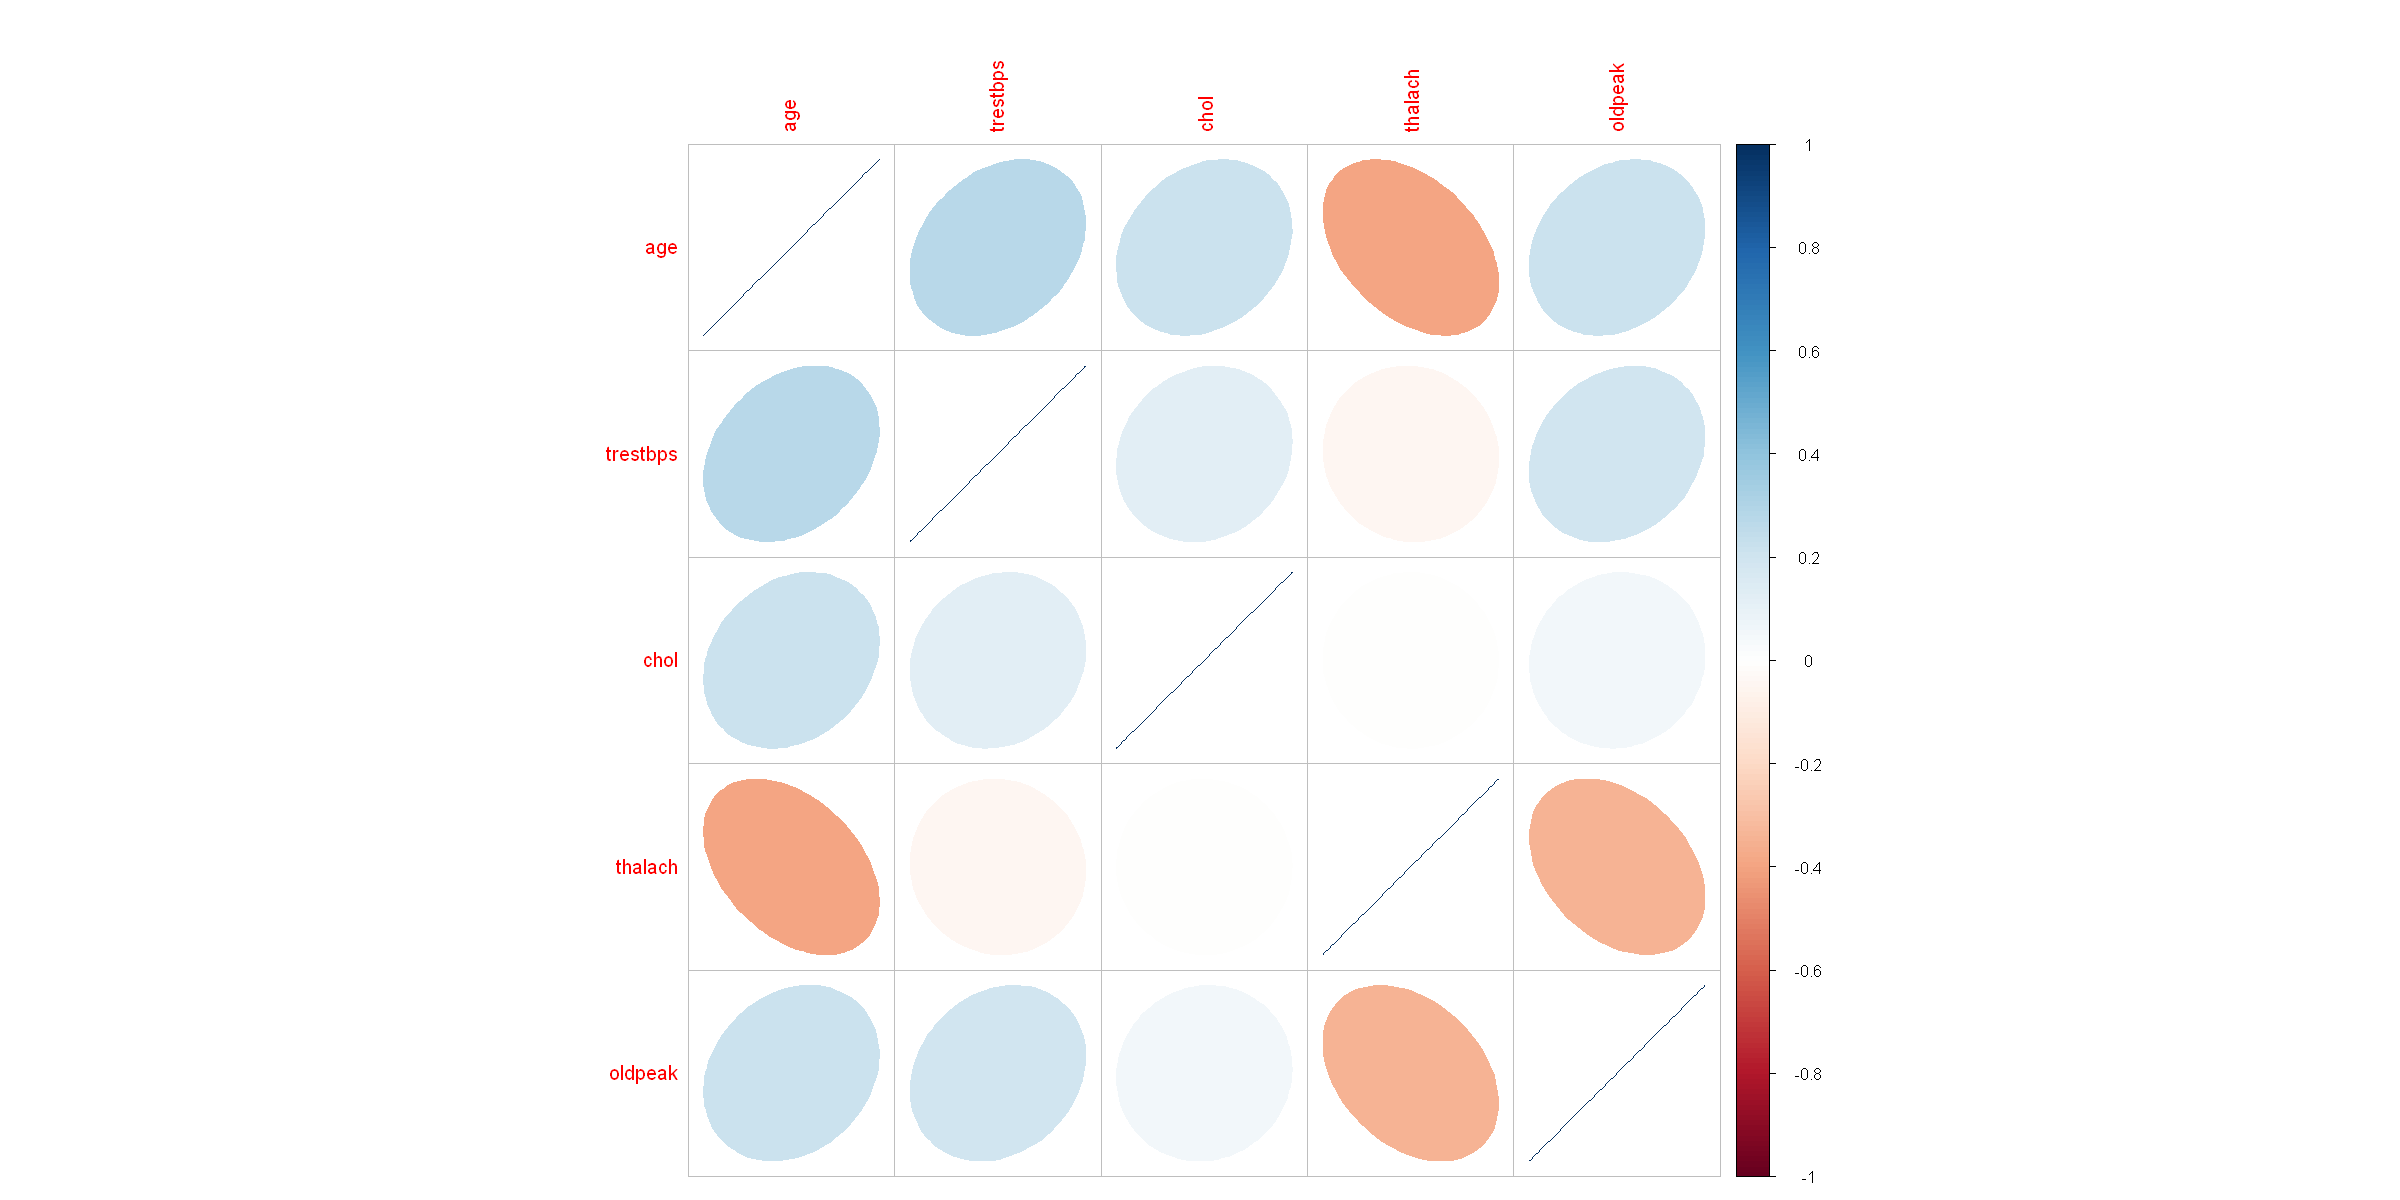

In [237]:
corrplot(cor_heart, method ='ellipse') +
   theme(text=element_text(size=35))

## Checking for na values

In [238]:
s = sum(is.na(data2))

In [239]:
s

[1] 0

## Logistic Regression

In [240]:
library(caret)
library(lattice)
set.seed(10)

In [241]:
inTrainRows <- createDataPartition(data2$target,p=0.7,list=FALSE)
trainData <- data2[inTrainRows,]
testData <-  data2[-inTrainRows,]
nrow(trainData)/(nrow(testData)+nrow(trainData))

[1] 0.7029703

In [242]:
AUC = list()
Accuracy = list()

In [243]:
set.seed(100)
logRegModel <- train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type='prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg <- roc(as.numeric(target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy'] 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


ERROR: Error in roc(as.numeric(target), as.numeric(as.matrix((logRegPredictionprob)))): object 'target' not found


In [244]:
install.packages('e1071', dependencies=TRUE)

Installing package into 'C:/Users/abhis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhis\AppData\Local\R\win-library\4.2\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\abhis\AppData\Local\R\win-library\4.2\e1071\libs\x64\e1071.dll: Permission denied"
Warning message:
"restored 'e1071'"



The downloaded binary packages are in
	C:\Users\abhis\AppData\Local\Temp\Rtmp8SfRTc\downloaded_packages


In [245]:
set.seed(10)
logRegModel <- train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type='prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg <- roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy']

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [246]:
AUC$logReg

Area under the curve: 0.9298

In [247]:
Accuracy$logReg

Accuracy 
0.8666667

## Support Vector Machine

In [248]:
set.seed(10)
svmModel <- train(target ~ ., data = trainData,
                 method = "svmRadial",
                 trControl = fitControl,
                 preProcess = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmPrediction <- predict(svmModel, testData2)
svmPredictionprob <- predict(svmModel, testData2, type='prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData2[,"target"])
#ROC Curve
AUC$svm <- roc(as.numeric(testData2$target),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy']

ERROR: Error in predict.train(svmModel, testData2): object 'testData2' not found


In [249]:
AUC$svm

NULL

In [250]:
Accuracy$svm

NULL

In [251]:
library(kernlab)

In [252]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

In [253]:
set.seed(10)
svmModel <- train(target ~ ., data = trainData,
                 method = "svmRadial",
                 trControl = fitControl,
                 preProcess = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmPrediction <- predict(svmModel, testData)
svmPredictionprob <- predict(svmModel, testData, type='prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData[,"target"])
#ROC Curve
AUC$svm <- roc(as.numeric(testData$target),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy']

Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [254]:
AUC$svm

Area under the curve: 0.896

In [255]:
Accuracy$svm

Accuracy 
0.8111111

## Random Forest

In [256]:
library(randomForest)
set.seed(10)
RFModel <- randomForest(target ~ .,
                    data=trainData, 
                    importance=TRUE, 
                    ntree=200)
#varImpPlot(RFModel)
RFPrediction <- predict(RFModel, testData)
RFPredictionprob = predict(RFModel,testData,type="prob")[, 2]

RFConfMat <- confusionMatrix(RFPrediction, testData[,"target"])

AUC$RF <- roc(as.numeric(testData$target),as.numeric(as.matrix((RFPredictionprob))))$auc
Accuracy$RF <- RFConfMat$overall['Accuracy']

Setting levels: control = 1, case = 2

Setting direction: controls < cases



## Comparison of AUC and Accuracy between models

In [257]:
row.names <- names(Accuracy)
col.names <- c("AUC", "Accuracy")
cbind(as.data.frame(matrix(c(AUC,Accuracy),nrow = 3, ncol = 2,
                           dimnames = list(row.names, col.names))))

,AUC,Accuracy
,<named list>,<named list>
logReg,0.9298158,0.8666667
svm,0.8959681,0.8111111
RF,0.888004,0.8333333


## Summary of Logistic Regression Model

In [258]:
summary(logRegModel)$coeff

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.002901016,3.672817206,-0.2730604,0.784806770
sexMALE,-1.108411204,0.629831168,-1.7598545,0.078432483
`fbs>120`,0.099727473,0.695895093,0.1433082,0.886046780
exangYES,-1.053668716,0.507650309,-2.0755798,0.037932833
`cpATYPICAL ANGINA`,0.576785085,0.673929885,0.8558533,0.392078955
`cpNON-ANGINAL PAIN`,1.766764364,0.599090285,2.9490786,0.003187229
restecgNORMAL,-0.389889283,0.467477322,-0.8340282,0.404265076
`restecgPROBABLE OR DEFINITE`,-1.405550323,2.763325521,-0.5086445,0.611001432
slope1,-0.176704487,0.989144482,-0.1786438,0.858217433
slope2,0.553034654,1.061991982,0.5207522,0.602539410


## Confusion Matrix

## Logistic Regression Confusion Matrix

In [259]:
logRegConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  34   5
       YES  7  44
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7787, 0.9292)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 6.754e-11       
                                          
                  Kappa : 0.7301          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.8293          
            Specificity : 0.8980          
         Pos Pred Value : 0.8718          
         Neg Pred Value : 0.8627          
             Prevalence : 0.4556          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.8636          
                                          
       'Positive' Class : NO              
                                 

## Random Forest Confusion Matrix

In [260]:
RFConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  31   5
       YES 10  44
                                        
               Accuracy : 0.8333        
                 95% CI : (0.74, 0.9036)
    No Information Rate : 0.5444        
    P-Value [Acc > NIR] : 7.067e-09     
                                        
                  Kappa : 0.6606        
                                        
 Mcnemar's Test P-Value : 0.3017        
                                        
            Sensitivity : 0.7561        
            Specificity : 0.8980        
         Pos Pred Value : 0.8611        
         Neg Pred Value : 0.8148        
             Prevalence : 0.4556        
         Detection Rate : 0.3444        
   Detection Prevalence : 0.4000        
      Balanced Accuracy : 0.8270        
                                        
       'Positive' Class : NO            
                                        

## Support Vector Machine Confusion Matrix

In [261]:
svmConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  34  10
       YES  7  39
                                          
               Accuracy : 0.8111          
                 95% CI : (0.7149, 0.8859)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 1.061e-07       
                                          
                  Kappa : 0.6215          
                                          
 Mcnemar's Test P-Value : 0.6276          
                                          
            Sensitivity : 0.8293          
            Specificity : 0.7959          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.8478          
             Prevalence : 0.4556          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4889          
      Balanced Accuracy : 0.8126          
                                          
       'Positive' Class : NO              
                                 

## Analysis of the area under the ROC and the accuracy of the model predictions shows that Logistic Regression performs best (accuracy 0.87). 
## ``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## Appendix

In [263]:
svmModel

Support Vector Machines with Radial Basis Function Kernel 

213 samples
 13 predictor
  2 classes: 'NO', 'YES' 

Pre-processing: centered (21), scaled (21) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 192, 191, 192, 191, 191, 192, ... 
Resampling results across tuning parameters:

  C      ROC        Sens       Spec     
   0.25  0.8931086  0.7932222  0.8209848
   0.50  0.8915732  0.7793333  0.8158333
   1.00  0.8862449  0.7752222  0.8150758
   2.00  0.8792449  0.7640000  0.8148485
   4.00  0.8750690  0.7561111  0.8243182
   8.00  0.8634268  0.7355556  0.8124242
  16.00  0.8549369  0.7375556  0.8090152
  32.00  0.8463476  0.7334444  0.7888636

Tuning parameter 'sigma' was held constant at a value of 0.03015848
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.03015848 and C = 0.25.

In [264]:
RFModel


Call:
 randomForest(formula = target ~ ., data = trainData, importance = TRUE,      ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.37%
Confusion matrix:
    NO YES class.error
NO  75  22   0.2268041
YES 15 101   0.1293103

In [265]:
logRegModel

Generalized Linear Model 

213 samples
 13 predictor
  2 classes: 'NO', 'YES' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 213, 213, 213, 213, 213, 213, ... 
Resampling results:

  Accuracy   Kappa    
  0.7843334  0.5653839


In [266]:
summary(logRegModel)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7165  -0.3515   0.1469   0.4582   2.7599  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   -1.002901   3.672817  -0.273  0.78481   
sexMALE                       -1.108411   0.629831  -1.760  0.07843 . 
`fbs>120`                      0.099727   0.695895   0.143  0.88605   
exangYES                      -1.053669   0.507650  -2.076  0.03793 * 
`cpATYPICAL ANGINA`            0.576785   0.673930   0.856  0.39208   
`cpNON-ANGINAL PAIN`           1.766764   0.599090   2.949  0.00319 **
restecgNORMAL                 -0.389889   0.467477  -0.834  0.40427   
`restecgPROBABLE OR DEFINITE` -1.405550   2.763326  -0.509  0.61100   
slope1                        -0.176704   0.989144  -0.179  0.85822   
slope2                         0.553035   1.061992   0.521  0.60254   
ca1                           -1.777145   0.645109  -2.755  0.00587 **
ca2    

In [267]:
summary(svmModel)

Length  Class   Mode 
     1   ksvm     S4 

In [268]:
summary(RFModel)

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       213    factor numeric  
err.rate        600    -none- numeric  
confusion         6    -none- numeric  
votes           426    matrix numeric  
oob.times       213    -none- numeric  
classes           2    -none- character
importance       52    -none- numeric  
importanceSD     39    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           14    -none- list     
y               213    factor numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

## ------------------------------------------------------- THE END ----------------------------------------------------------